In [125]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [126]:
df=pd.read_csv('Social_Network_Ads.csv')
df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [127]:
df=df.iloc[:,2:]
df.head(5)

,Age,EstimatedSalary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


Train test split

In [128]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size=0.3,
                                                    random_state=0)

In [129]:
x_train

,Age,EstimatedSalary
92,26,15000
223,60,102000
234,38,112000
232,40,107000
377,42,53000
...,...,...
323,48,30000
192,29,43000
117,36,52000
47,27,54000


In [130]:
y_train

92     0
223    1
234    0
232    1
377    0
      ..
323    1
192    0
117    0
47     0
172    0
Name: Purchased, Length: 280, dtype: int64

In [131]:
y_test

132    0
309    0
341    0
196    0
246    0
      ..
216    0
259    1
49     0
238    0
343    1
Name: Purchased, Length: 120, dtype: int64

StandardScaler

In [132]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(x_train)

,copy,True
,with_mean,True
,with_std,True


In [133]:
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [134]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [135]:
x_train_scaled=pd.DataFrame(x_train_scaled,columns=x_train.columns)
x_test_scaled=pd.DataFrame(x_test_scaled,columns=x_test.columns)

In [136]:
np.round(x_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [137]:
np.round(x_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


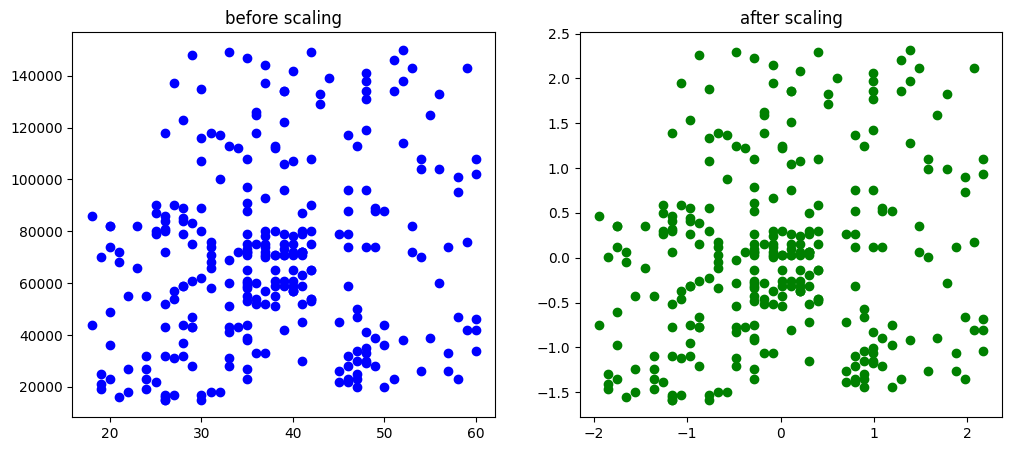

In [138]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.scatter(x_train['Age'],x_train['EstimatedSalary'],color='blue')
ax1.set_title('before scaling')
ax2.scatter(x_train_scaled['Age'],x_train_scaled['EstimatedSalary'],color='green')
ax2.set_title('after scaling')
plt.show()

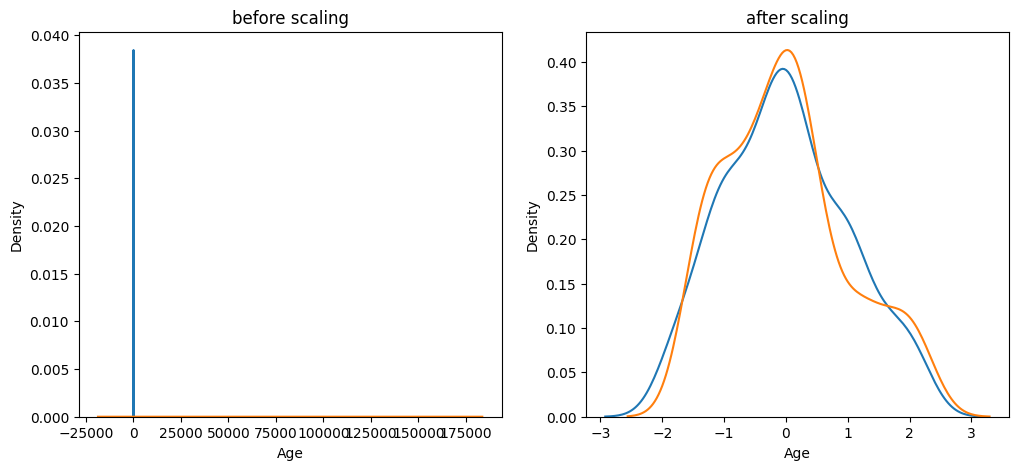

In [139]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))
ax1.set_title('before scaling')
sns.kdeplot(x_train['Age'],ax=ax1)
sns.kdeplot(x_train['EstimatedSalary'],ax=ax1)

ax2.set_title('after scaling')
sns.kdeplot(x_train_scaled['Age'],ax=ax2)
sns.kdeplot(x_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

In [140]:
from sklearn.linear_model import LogisticRegression

In [141]:
lr=LogisticRegression()
lr_scaled=LogisticRegression()

In [142]:
lr.fit(x_train,y_train)
lr_scaled.fit(x_train_scaled,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [143]:
y_pred=lr.predict(x_test)
y_pred_scaled=lr_scaled.predict(x_test_scaled)

In [144]:
from sklearn.metrics import accuracy_score

In [145]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))


Actual 0.875
Scaled 0.8666666666666667


In [146]:
from sklearn.tree import DecisionTreeClassifier

In [147]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [148]:
dt.fit(x_train,y_train)
dt_scaled.fit(x_train_scaled,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [149]:
y_pred = dt.predict(x_test)
y_pred_scaled = dt_scaled.predict(x_test_scaled)

In [150]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.875
